In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dashkaermak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Replace with your actual path
df = pd.read_csv('/Users/dashkaermak/Desktop/Datasets/amazon_reviews.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [6]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3948
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4971
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          1
sourceURLs                0
dtype: int64

In [20]:
custom_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now'
])

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stopwords]
    return ' '.join(tokens)

df['cleaned_review'] = df['reviews.text'].apply(clean_text)
df[['reviews.text', 'cleaned_review']].head()

,reviews.text,cleaned_review
0,I thought it would be as big as small paper bu...,thought would big small paper turn like palm t...
1,This kindle is light and easy to use especiall...,kindle light easy use especially beach
2,Didnt know how much i'd use a kindle so went f...,didnt know much id use kindle went lower end i...
3,I am 100 happy with my purchase. I caught it o...,100 happy purchase caught sale really good pri...
4,Solid entry level Kindle. Great for kids. Gift...,solid entry level kindle great kids gifted kid...


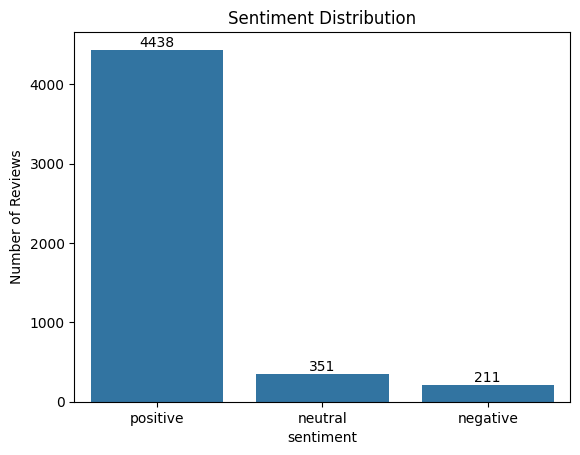

In [25]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['polarity'] = df['cleaned_review'].apply(get_sentiment)
df['sentiment'] = df['polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

ax = sns.countplot(data=df, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Sentiment Distribution')
plt.ylabel('Number of Reviews')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 5,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=10)
    
plt.show()

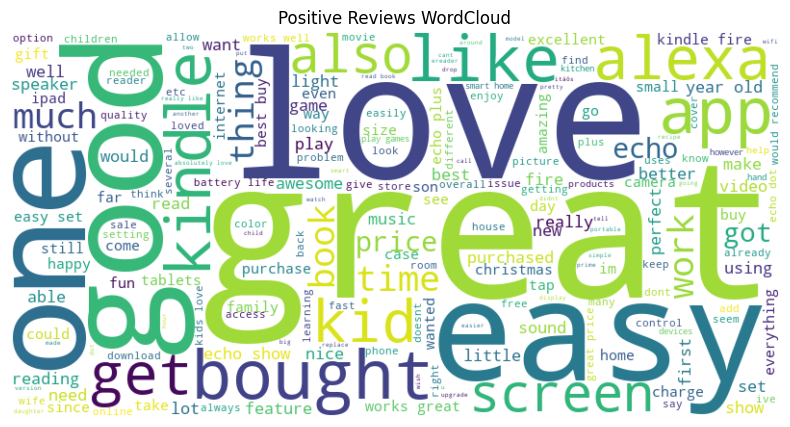

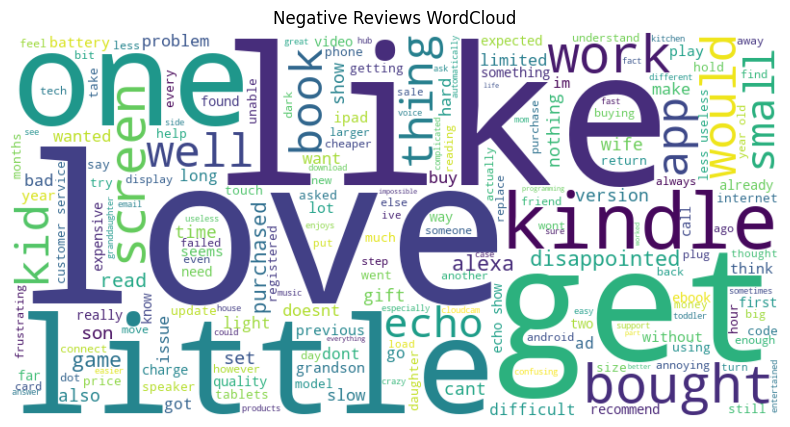

In [27]:
# Word Clouds for Positive and Negative Reviews

extra_stopwords = set(['tablet', 'product', 'device', 'amazon', 'item', 'use', 'used'])

positive_words = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
negative_words = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])

wordcloud_stopwords = extra_stopwords.union(custom_stopwords)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=wordcloud_stopwords).generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews WordCloud')
plt.show()

wordcloud_neg = WordCloud(width=800, height=400, background_color='white', stopwords=wordcloud_stopwords).generate(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews WordCloud')
plt.show()

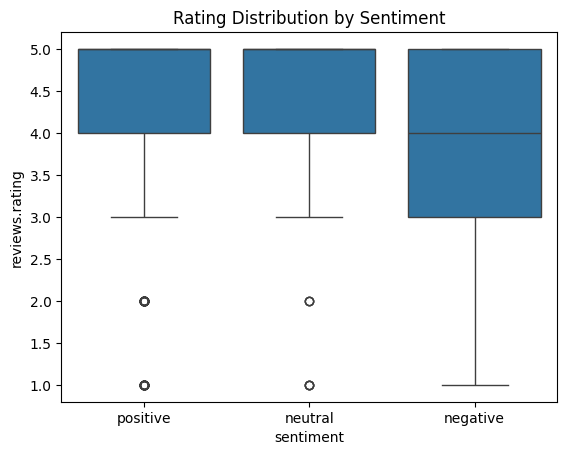

In [28]:
# Rating distribution by sentiment

sns.boxplot(data=df, x='sentiment', y='reviews.rating', order=['positive', 'neutral', 'negative'])
plt.title('Rating Distribution by Sentiment')
plt.show()

In [29]:
# Top 10 most helpful reviews

df.sort_values(by='reviews.numHelpful', ascending=False)[['reviews.text', 'reviews.numHelpful']].head(10)

,reviews.text,reviews.numHelpful
2364,"I've had lots of tablets in the past, mostly f...",105
4871,"I've had lots of tablets in the past, mostly f...",105
70,Looking at the picture and seeing it was 8th g...,97
4054,I bought my Fire HD8 as an alternative to carr...,55
4777,Despite not being able to get one of these fro...,49
186,"When I first read about Amazon Echo Show, I th...",40
383,I loved this thing until it was time to go to ...,35
1876,This is a great tablet if you have reasonable ...,33
3409,I have a Paper White 1 and 2. Honestly it is d...,27
462,"Love that I can view my arlo cams on it , love...",26


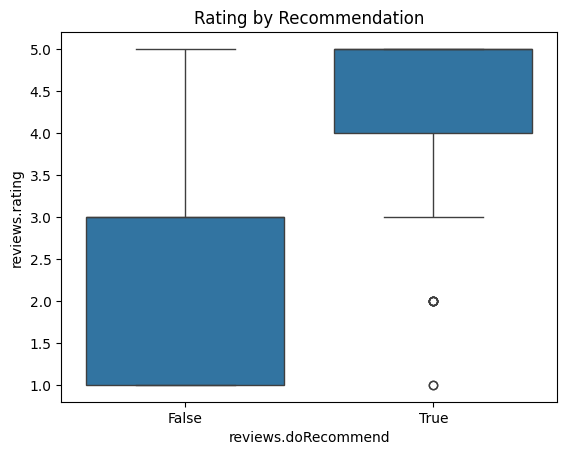

In [30]:
# Recommendation vs rating

sns.boxplot(x='reviews.doRecommend', y='reviews.rating', data=df)
plt.title('Rating by Recommendation')
plt.show()

## 📊 Final Insights Summary

1. **Sentiment Analysis**  
The sentiment distribution reveals a significant dominance of positive reviews (**4,438**) compared to neutral (**351**) and negative (**211**) ones. This highlights strong product satisfaction overall. However, it's essential to examine the negative reviews to identify potential areas for improvement.

2. **Word Clouds for Positive and Negative Reviews**  
Both positive and negative word clouds share many similar keywords, which may reduce the precision of sentiment-based interpretation. To enhance the accuracy of sentiment detection, a more advanced NLP model could be trained to better capture emotional context and differentiate between truly positive and negative expressions.

3. **Rating Distribution by Sentiment**  
Most users—regardless of sentiment—gave ratings above 3. For both neutral and positive sentiments, 75% of the reviews fall between **4 and 5 stars**. Interestingly, around **35% of users who wrote negative reviews still gave high ratings**, suggesting that the product generally performs well and meets its description, despite some unmet expectations or minor flaws. More detailed analysis is recommended for the **15–25% of users** who gave ratings between **1 and 3** to identify recurring issues for improvement.

4. **Top 10 Most Helpful Reviews**  
These reviews reflect user-perceived product value and provide useful insights for product development. Highlighting these can also support future marketing or customer engagement strategies.

5. **Recommendation vs. Rating**  
About **25% of users** gave high ratings (**3 to 5 stars**) yet did not recommend the product. This indicates that some reviews, while overall positive in tone or rating, might reflect dissatisfaction with specific features or external factors (e.g. shipping, packaging, expectations).  
Conversely, most users who recommended the product gave it **4 to 5 stars**, though a few recommended it even with slightly lower scores. It's worth investigating the **high-rating / no-recommendation** group to determine whether issues lie with the product or the purchase experience.
